In [49]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import pyarrow.feather as feather
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Preparing dataframe
Creating different data frames for different parts of the analysis

In [2]:

export_df = feather.read_feather("../data/data_EDA.feather")
selected_columns = export_df[["event_timestamp","reaction_time","event_name","created_at","notif_viewed_ontime","published_at",'opened']]
day_analisis = selected_columns.copy()

# Grouping by users
### The objective is to analize their stats on the user level for being able to identify different users later.

In [51]:
gpbyuser= export_df.groupby( by= ['user_id'])
gpbyuser2=gpbyuser.sum()
gpbyuser2['count1'] = gpbyuser.size()
gpbyuser2['opened_rate'] = gpbyuser2['opened']/gpbyuser2['count1']

### Checking the amount of messages that users have, in order to find the proper cut on new users (a user with very low interactions give us not much information)

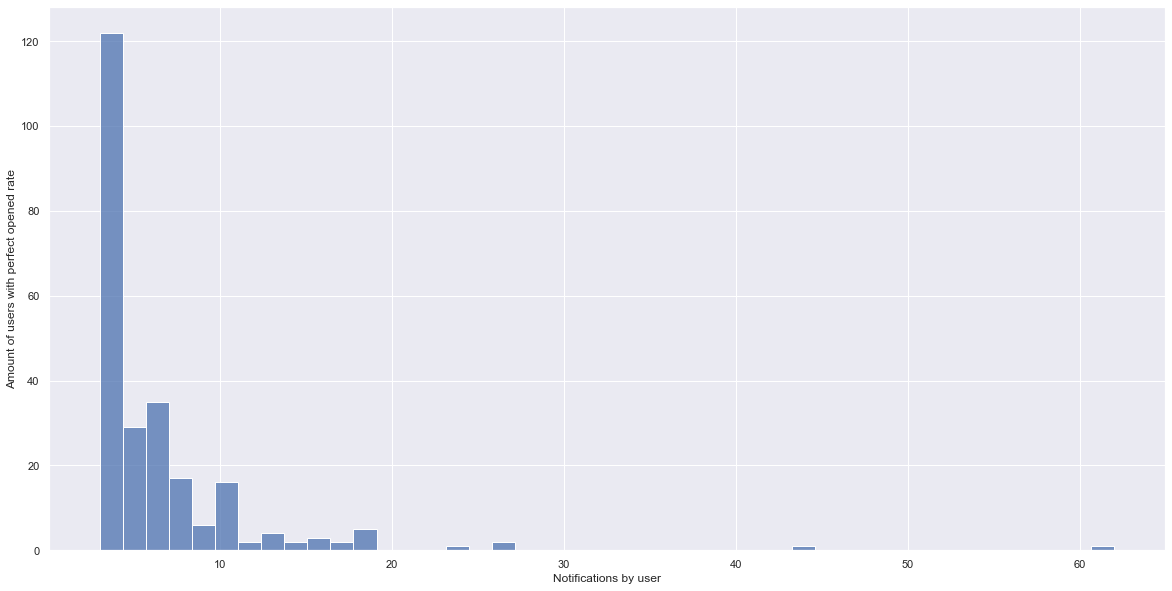

In [55]:
gpbyuser_dismissers= gpbyuser2.loc[gpbyuser2['opened_rate']== 0 ]
gpbyuser_openers= gpbyuser2.loc[gpbyuser2['opened_rate']== 1]
x=gpbyuser_openers['count1']
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x)
plt.ylabel('Amount of users with perfect opened rate')
plt.xlabel('Notifications by user');

### Many users with less than 3 interactions have perfect opened rate. We remove this users, as analyzing them would only make up our results with 0 valuable information.

In [ ]:
gpbyuser2['ontime_activity_rate'] = gpbyuser2["notif_viewed_ontime"]/gpbyuser2['count1']
gpbyuser2.drop(gpbyuser2[gpbyuser2['count1'] <3].index, inplace=True)
real_users=gpbyuser2.index.tolist()
export_df=export_df[export_df['user_id'].isin(real_users)]
gpbyuser2

# Grouping by incidents
### The objective is to give them an opened rate and ontime activity rate, to categorize the different incidents.

In [4]:
gpbyincident= export_df.groupby( by= ['document_id', 'description','cause', 'effect'])
gpbyincident2=gpbyincident.sum()
gpbyincident2['count1'] = gpbyincident.size()
gpbyincident2['opened_rate'] = gpbyincident2['opened']/gpbyincident2['count1']
gpbyincident2['ontime_activity_rate'] = gpbyincident2["notif_viewed_ontime"]/gpbyincident2['count1']
gpbyincident2

,,,,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren_Suburbano,Tren_Ligero,Camion_Microbus_Combi,notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
document_id,description,cause,effect,,,,,,,,,,,,,,,,,,,,,
-MPvKI-ULauyGmrJiWwV,⏳ ¡Ojo! Retrasos por movilización de cuerpos de emergencia en Calzada México-Tacuba cerca del Metro Cuitláhuac.,EmergencyServices,Delays,-495.908793,97.287246,555,5.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,2,1455.400000,0,0.000000,0,5,0.400000
-MPvhmTRVhrMWLAjtSS6,⏳ ¡Toma tus precauciones! Retrasos por incendio en Av. del Mazo y Norte 23.,Fire,Delays,-197.878559,38.598469,152,2.0,48.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0,903.616667,0,0.000000,0,2,0.000000
-MPwL4RRplvymPwZRy2F,⏳ ¡Aguas! Retrasos por percance vehicular en Calz. Ignacio Zaragoza y Río Churubusco.,VehicularAccident,Delays,-891.689990,174.673242,765,9.0,72.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,9.0,5,1215.900000,0,0.000000,0,9,0.555556
-MQCQhzkbRqMo0TsIibZ,"⏳ ¡Aguas! Retrasos por percance vehicular Avenida Cuauhtémoc a la altura de Obrero Mundial, en dirección a Xola.\n\n\n",VehicularAccident,LaneReduction,-30044.097484,5878.876324,34845,303.0,2424.0,0.0,303.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50,45314.333333,30,0.099010,303,303,0.165017
-MQCg-TMJBO4h-CsreUU,"¡Ojo! Hay demoras por choque en el Eje 4 Oriente a la altura de la calle Jaime Torres Bodet, hacia el Eje 1 Norte.",VehicularAccident,Delays,-495.789882,97.235125,570,0.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,1045.683333,0,0.000000,0,5,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-MdyS-3Odath0RqKOve5,⏳ ¡Ojo! Retrasos por percance en Av. Montevideo y Cienfuegos.,VehicularAccident,Delays,-9417.537030,1851.561203,5795,95.0,570.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,56,12233.650000,2,0.021053,0,95,0.589474
-MdySISY5hSJPgekQ7pR,🚦 ¡Anticípate! Retrasos por semáforos descompuestos en Eje 6 Sur al cruce con Avenida Presidente Plutarco Elías Calles.,BrokenTrafficLight,Delays,-4163.695865,813.848794,4998,42.0,546.0,0.0,42.0,0.0,0.0,0.0,...,0.0,0.0,42.0,31,3481.033333,0,0.000000,0,42,0.738095
-MdyjLp8Li6p6HZRc_So,⏳ ¡Úchala! Retrasos por percance en Calzada Ignacio Zaragoza a la altura de Avenida República Federal del Sur con dirección hacia Guelatao.,VehicularAccident,Delays,-13268.242253,2595.954543,18760,134.0,1206.0,0.0,0.0,0.0,134.0,0.0,...,0.0,0.0,134.0,94,14738.916667,4,0.029851,0,134,0.701493


# Grouping by cause
### The objective is to analyze the number of different causes.

In [5]:
gpbycause= export_df.groupby( by= ['cause'])
gpbycause2=gpbycause.sum()
gpbycause2['count1'] = gpbycause.size()
gpbycause2['opened_rate'] = gpbycause2['opened']/gpbycause2['count1']
gpbycause2['ontime_activity_rate'] = gpbycause2["notif_viewed_ontime"]/gpbycause2['count1']
gpbycause2

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren_Suburbano,Tren_Ligero,Camion_Microbus_Combi,notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
cause,,,,,,,,,,,,,,,,,,,,,
BrokenTrafficLight,-1.634792e+05,3.203122e+04,172747,1752.0,17636.0,113.0,669.0,0.0,537.0,50.0,...,0.0,0.0,1633.0,957,1.840344e+05,45,0.027289,390,1649,0.580352
BrokenVehicle,-2.676466e+06,5.240896e+05,3513285,27143.0,312812.0,5034.0,14764.0,3953.0,4859.0,0.0,...,0.0,16.0,26894.0,14715,3.288873e+06,726,0.025242,2338,28762,0.511613
COVID19,-2.182013e+04,4.270901e+03,505740,3430.0,73234.0,2359.0,951.0,1203.0,2027.0,0.0,...,0.0,0.0,150.0,3031,4.272145e+05,220,0.058839,2151,3739,0.810645
Counterflow,0.000000e+00,0.000000e+00,25149,303.0,3030.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,120,3.150503e+04,15,0.049505,0,303,0.396040
CycleRide,-9.242255e+04,1.808983e+04,113489,1158.0,12751.0,565.0,43.0,195.0,273.0,478.0,...,0.0,0.0,932.0,513,1.269777e+05,17,0.018240,0,932,0.550429
Demonstration,-1.261918e+07,2.471153e+06,23071266,172746.0,2274216.0,53871.0,69046.0,31215.0,49677.0,838.0,...,277.0,327.0,115276.0,113850,1.908121e+07,7096,0.040386,54800,175704,0.647965
EmergencyServices,-5.506805e+06,1.078286e+06,6553838,55850.0,637837.0,7571.0,17688.0,6499.0,8036.0,193.0,...,0.0,106.0,54141.0,27462,6.669518e+06,1474,0.026430,6412,55769,0.492424
Event,-2.072238e+04,4.062324e+03,186737,913.0,11810.0,495.0,79.0,208.0,261.0,0.0,...,0.0,0.0,209.0,959,1.595552e+05,84,0.069193,957,1214,0.789951
Explosion,-1.980777e+03,3.900331e+02,3040,20.0,260.0,0.0,20.0,0.0,0.0,0.0,...,0.0,0.0,20.0,14,7.265667e+02,3,0.150000,20,20,0.700000


# Grouping by effect
### The objective is to analyze the number of different effects.

In [6]:
gpbyeffect= export_df.groupby( by= ['effect'])
gpbyeffect2=gpbyeffect.sum()
gpbyeffect2['count1'] = gpbyeffect.size()
gpbyeffect2['opened_rate'] = gpbyeffect2['opened']/gpbyeffect2['count1']
gpbyeffect2['ontime_activity_rate'] = gpbyeffect2["notif_viewed_ontime"]/gpbyeffect2['count1']
gpbyeffect2

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren_Suburbano,Tren_Ligero,Camion_Microbus_Combi,notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
effect,,,,,,,,,,,,,,,,,,,,,
,-5.618372e+04,1.099507e+04,157556,1345.0,21377.0,159.0,877.0,140.0,644.0,0.0,...,0.0,0.0,567.0,1029,1.750979e+05,53,0.038602,208,1373,0.749454
CirculationRestored,-2.013270e+06,3.942479e+05,3243188,25648.0,214075.0,2898.0,13819.0,2554.0,3153.0,0.0,...,222.0,109.0,17198.0,12347,3.035885e+06,880,0.033877,3740,25976,0.475323
CirculationShutdown,-1.124517e+07,2.201933e+06,15048479,115895.0,1611445.0,38520.0,46490.0,22657.0,36022.0,80.0,...,55.0,290.0,106672.0,82421,1.329449e+07,4023,0.034130,25642,117873,0.699236
Delays,-3.257026e+07,6.377952e+06,51994320,452923.0,5854126.0,95128.0,219385.0,73755.0,128822.0,242.0,...,0.0,398.0,312303.0,253801,5.252894e+07,14077,0.031004,71138,454042,0.558981
Evacuation,-9.816172e+03,1.925191e+03,28719,252.0,2115.0,0.0,99.0,0.0,0.0,0.0,...,0.0,0.0,99.0,144,3.302310e+04,7,0.027778,0,252,0.571429
FullCapacity,-6.149259e+03,1.200648e+03,101049,853.0,19761.0,836.0,41.0,345.0,656.0,0.0,...,0.0,0.0,0.0,461,6.618342e+04,68,0.079719,812,853,0.540445
HighWaitingTime,-3.936658e+04,7.696293e+03,3382082,28906.0,415334.0,6801.0,10570.0,8225.0,11326.0,370.0,...,0.0,0.0,238.0,18090,3.178392e+06,1491,0.051162,15419,29143,0.620732
InterimService,-1.520715e+05,2.981364e+04,2750996,15549.0,215299.0,8471.0,5095.0,2517.0,4381.0,0.0,...,0.0,46.0,284.0,11135,1.784807e+06,944,0.062774,10166,15038,0.740458
LaneReduction,-3.888689e+06,7.613555e+05,5088894,40000.0,396124.0,3623.0,18569.0,1033.0,3153.0,0.0,...,75.0,134.0,38572.0,17630,5.233719e+06,1064,0.026905,4864,39547,0.445799


 # Analyzing agencies

In [7]:
#Deeper understanding on agencies. Choosing aggfunc sum, as we want to know how many users are affected by their notifications. Observing values for both active and unactive users, it does not matter, as this is addressed in another part.
agencies_by_cause = pd.pivot_table(export_df, values=['Sendero_Segura','Red_Transporte_Pasajeros',
'Mexibus', 'Metro', 'Metrobus', 'Mexicable', 'Trolebus', 'Cablebus', 'Tren_Suburbano', 'Tren_Ligero',
 'Camion_Microbus_Combi'], index=['cause'], aggfunc=np.sum, fill_value=0, margins=True, margins_name= 'Total')
agencies_by_effect = pd.pivot_table(export_df, values=['Sendero_Segura','Red_Transporte_Pasajeros',
'Mexibus', 'Metro', 'Metrobus', 'Mexicable', 'Trolebus', 'Cablebus', 'Tren_Suburbano', 'Tren_Ligero',
 'Camion_Microbus_Combi'], index=['effect'], aggfunc=np.sum, fill_value=0, margins=True, margins_name= 'Total')

In [8]:
#Agencies MgUq5b9mOEunx6u4AXt_BA and V2AIQQKgmUO3VazvAOA-Cw created no incidents, dropping them
agencies_by_effect.drop(["Cablebus","Mexicable"],axis=1, inplace=True)
agencies_by_cause.drop(["Cablebus","Mexicable"],axis=1, inplace=True)

In [9]:
agencies_by_effect

,Camion_Microbus_Combi,Metro,Metrobus,Mexibus,Red_Transporte_Pasajeros,Sendero_Segura,Tren_Ligero,Tren_Suburbano,Trolebus
effect,,,,,,,,,
,567,619,255,47,410,0,0,0,0
CirculationRestored,17198,3747,15295,578,13847,109,109,222,1705
CirculationShutdown,106672,6929,35411,1422,75201,1366,290,55,13940
Delays,312303,122372,40170,6264,233199,3232,398,0,13685
Evacuation,99,153,0,0,0,0,0,0,0
FullCapacity,0,750,103,0,0,0,0,0,0
HighWaitingTime,238,28522,362,10,249,0,0,0,0
InterimService,284,4140,9353,477,284,284,46,0,1022
LaneReduction,38572,1384,2287,0,30342,1128,134,75,167


 # Missed users
 ### Checking how many users are not checking notifications while the incident is still active.

In [36]:
missed_users=export_df["notif_viewed_ontime"].value_counts()
missed_users[1]/(missed_users[1]+missed_users[0])


0.5795064715533386

 57,95% of notifications are viewed ontime.

# Plotting
### In order to find trends, check some assumptions and make hypothesis

<AxesSubplot:xlabel='ontime_activity_rate', ylabel='opened'>

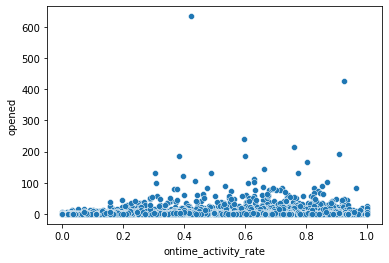

In [12]:
sns.scatterplot(data=gpbyuser2, y="opened", x="ontime_activity_rate")

There is not a real trend, when checking if ontime activity rate influences the amount of opened messages.

<AxesSubplot:xlabel='opened_rate', ylabel='notif_viewed_notontime'>

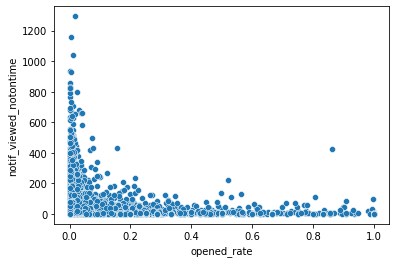

In [14]:
gpbyuser2["notif_viewed_notontime"]=gpbyuser2["count1"] - gpbyuser2["notif_viewed_ontime"] 
sns.scatterplot(data=gpbyuser2, x="opened_rate", y="notif_viewed_notontime")

It seems that there are many users who have 0 opened ratio because they do not check notifications ontime.

 # Identifying customers

In [18]:
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(gpbyuser2[["opened_rate", "ontime_activity_rate"]])

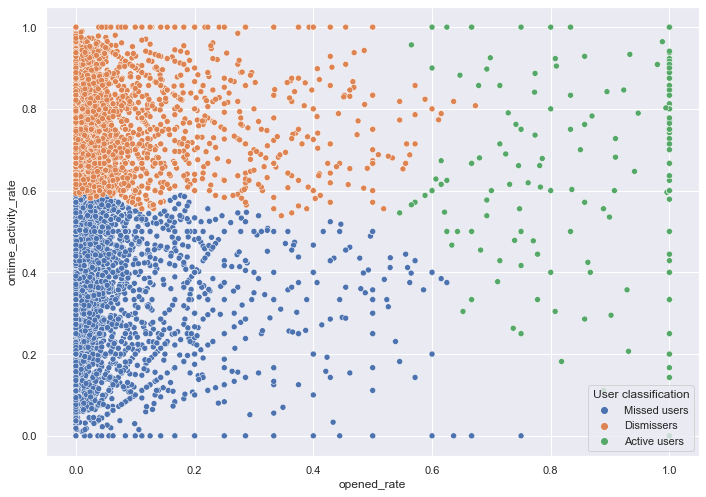

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.scatterplot(x=gpbyuser2["opened_rate"],y=gpbyuser2["ontime_activity_rate"], hue=agg_clust.labels_, palette="deep")
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ["Missed users","Dismissers","Active users"],loc='lower right', title='User classification')

[Text(0, 0, 'Missed users'),
 Text(1, 0, 'Dismissers'),
 Text(2, 0, 'Active users')]

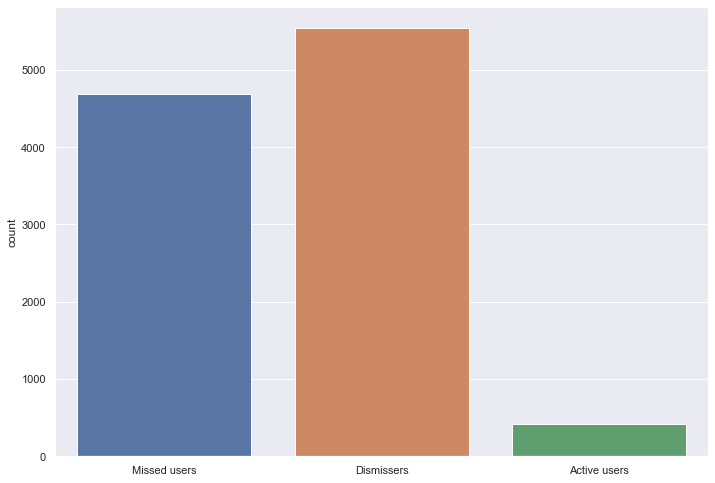

In [21]:
gpbyuser3=gpbyuser2.head()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.countplot(x=agg_clust.labels_, palette="deep")
ax.set_xticklabels(["Missed users","Dismissers","Active users"])

In [47]:
unique, counts = np.unique(agg_clust.labels_, return_counts=True)
user_counts=dict(zip(unique, counts))
user_counts

{0: 4683, 1: 5539, 2: 420}

We can see that the number of active users is extremely reduced, and the biggest group is the dismissers.

 # Identifying the time behaviour daily

 Excluding people who check their phone days later

In [22]:
day_analisis['reaction_hour'] = [row.hour for row in day_analisis['event_timestamp']]
day_analisis['reaction_time_in_hours'] = [row//(60) for row in day_analisis['reaction_time']]
day_analisis['notification_hour'] = [row.hour for row in day_analisis['created_at']]

<AxesSubplot:xlabel='reaction_hour', ylabel='count'>

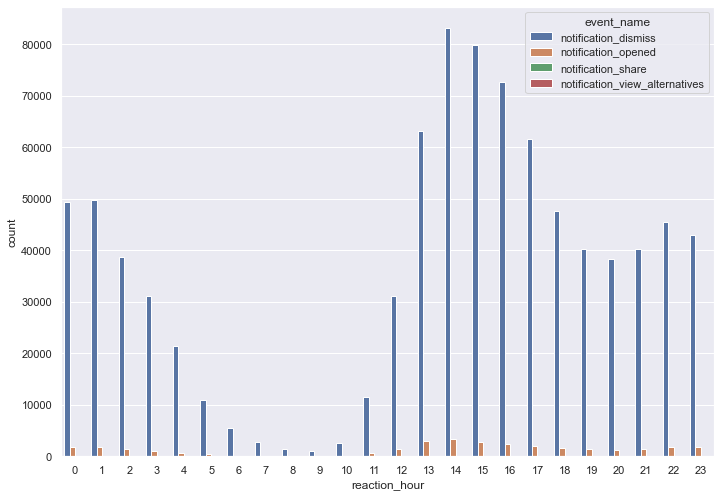

In [23]:
sns.countplot(data=day_analisis,x="reaction_hour", hue="event_name") #ploting notifications per hour

Very low interaction between 4-10 UTC (around 23 to 5 AM in local time). Huge interaction from 13 to 16 (8 to 11 AM local), rush hour. The amount of opened notifications remains low all across the day.

In [26]:
gpbnotification=day_analisis.groupby(by=["notification_hour",'reaction_time_in_hours',"opened"]).count()
gpbnotification.reset_index(inplace=True)
gpbnotification2=day_analisis.groupby(by=["notification_hour","opened"]).count()
gpbnotification2.reset_index(inplace=True)

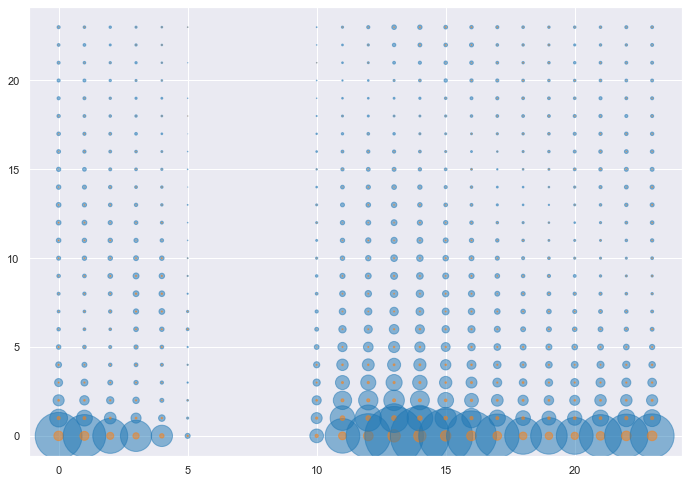

In [29]:
colors = {0:'tab:blue', 1:'tab:orange'}
s=[gpbnotification['created_at']*.06 ]
plt.scatter( x= gpbnotification['notification_hour'], y= gpbnotification['reaction_time_in_hours'], alpha=.5, c=gpbnotification["opened"].map(colors),s=s) 

In this plot, which increases the bubble size for each count, we see that the majority of interactions happen on time (0 to 2 hours since the incident is active). Opened incidents are focused on these 2 hours, and barely seen anywhere else.

<BarContainer object of 40 artists>

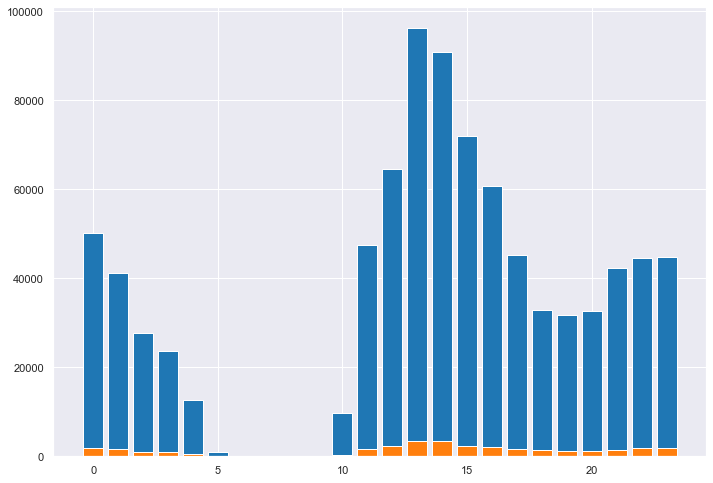

In [30]:
colors = {0:'tab:blue', 1:'tab:orange'}
plt.bar(x=gpbnotification2["notification_hour"], height=gpbnotification2['created_at'],color=gpbnotification2["opened"].map(colors))

Plot again without the reaction time in hours, just to see the count of opened and dismissed. As seen before, very few opened messages.